In [ ]:
!unzip R41.zip

Archive:  R41.zip
  inflating: R41.txt                 


In [ ]:
!ls -l R41.txt

-rw-r--r-- 1 root root 20697075 Aug  1 11:37 R41.txt


In [ ]:
!pip install graspologic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 9.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 578 kB 49.2 MB/s 
     |████████████████████████████████| 41 kB 623 kB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 1.0 MB 40.7 MB/s 
     |████████████████████████████████| 664 kB 51.9 MB/s 
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Created wheel for graspologic: filename=graspologic-1.0.0-py3-none-any.whl size=5186590 sha256=5ad80dd312fd69110297f0804995f20838209d55d84031b952630943fac7a9ae
  Stored in directory: /root/.cache/pip/wheels/dc/54/16/75bbc15f961a6cd1f1d5d6052147145b274a7d229fee40be4a
  Created wheel for hyppo: filename=hyppo-0.3.2-py3-none-any.w

In [ ]:
!pip install scikit-dimension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 


In [ ]:
import numpy as np
with open("R41.txt", "r") as f:
  d, n, m, k, p = [-1 if x == "_" else int(x) for x in f.readline().split()]
  ks = [int(x) for x in f.readline().split()]
  data = [[float(x) for x in string.split()] for string in f.readlines()]
  data = np.array(data)

data.shape

(119651, 25)

In [ ]:
!pip install pyod            
!pip install --upgrade pyod  
!pip install suod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 8.2 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=02a4bd6500323cba11931d42a136a787ea5e71a2e2abcb9ac946b6ffd7f451ab
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.8 MB/s 
  Created wheel for suod: filename=suod-0.0.8-py3-none-any.whl size=2155017 sha256=c5fc1be9d18302d8f777e56fccc1a53b3560a7c1a06c1cefe8d96d7cf3239a43
  Stored in directory: /root/.cache/pip/wheels/01/a0/03/d266aba1169e0fcc69bafab6a56fa6d90241262b6e0fe2a229
  Created wheel for combo: filename=combo-0.1.3-py3-none

In [ ]:
k = p
def get_pca_outlier_score():
  from pyod.models.pca import PCA as Outlier_PCA
  clf = Outlier_PCA(n_selected_components=3)
  clf.fit(data)
  return (clf.decision_scores_ - np.min(clf.decision_scores_)) / (np.max(clf.decision_scores_) - np.min(clf.decision_scores_))

def get_gmm_outlier_score():
  from pyod.models.gmm import GMM as Outlier_GMM
  clf = Outlier_GMM()
  clf.fit(data)
  return (clf.decision_scores_ - np.min(clf.decision_scores_)) / (np.max(clf.decision_scores_) - np.min(clf.decision_scores_))

def get_lof_outlier_score():
  from pyod.models.lof import LOF as Outlier_LOF
  clf = Outlier_LOF()
  clf.fit(data)
  return (clf.decision_scores_ - np.min(clf.decision_scores_)) / (np.max(clf.decision_scores_) - np.min(clf.decision_scores_))

def outlier_detection():
  scores = get_pca_outlier_score() + get_gmm_outlier_score() + get_lof_outlier_score()
  idx = np.argpartition(scores, -k)
  outliers = idx[-k:]
  normals = idx[:-k]
  return outliers, normals


In [ ]:
outliers, normals = outlier_detection()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_embedded = pca.fit_transform(data)

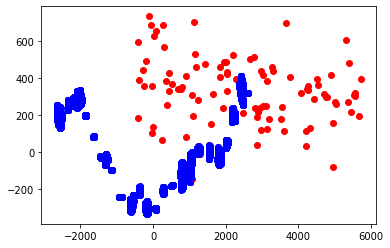

In [ ]:
plt.scatter(pca_embedded[outliers][:,0], pca_embedded[outliers][:,1], c = 'red')
plt.scatter(pca_embedded[normals][:,0], pca_embedded[normals][:,1], c = 'blue')
# plt.scatter(pca_embedded[:,0], pca_embedded[:,1])
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='single', n_clusters=30).fit(mini_dataset)

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

clustering_new = MiniBatchKMeans(n_clusters=10000, random_state=42).fit(data[normals])
mini_dataset = clustering_new.cluster_centers_

In [ ]:
pca = PCA(n_components=3)
pca_embedded = pca.fit_transform(mini_dataset)

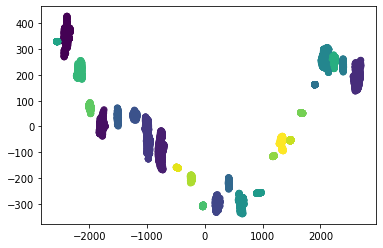

In [ ]:
plt.scatter(pca_embedded[:,0], pca_embedded[:,1], c = clustering.labels_)

#SOME TESTS

In [ ]:
def find_clusters_by_kmeans(dataset, max_m):
  criteria = []
  for i in range(2, max_m + 1):
    if i % 5 == 0:
      print(f'{i} steps has done.')
    test_clustering = KMeans(n_clusters=i, random_state=42).fit(dataset)
    criteria.append(test_clustering.inertia_)
  return criteria

In [ ]:
def find_clusters_by_gmm(dataset, max_m):
  from sklearn.mixture import GaussianMixture as GMM
  criteria = []
  for i in range(2, max_m + 1):
    if i % 5 == 0:
      print(f'{i} steps has done.')
    test_clustering = GMM(n_components=i, random_state=42).fit(dataset)
    criteria.append(test_clustering.bic(dataset))
  return criteria

In [ ]:
MAX_CLUSTERS = 30

In [ ]:
cri_mean = find_clusters_by_kmeans(mini_dataset, MAX_CLUSTERS)

5 steps has done.
10 steps has done.
15 steps has done.
20 steps has done.
25 steps has done.
30 steps has done.


In [ ]:
cri_gmm = find_clusters_by_gmm(mini_dataset, MAX_CLUSTERS)

5 steps has done.
10 steps has done.
15 steps has done.
20 steps has done.
25 steps has done.
30 steps has done.


In [ ]:
new_cri_gmm = [1]
for i in range(1, len(cri_gmm) - 1):
  new_cri_gmm.append(cri_gmm[i - 1] / (cri_gmm[i] + EPS))
new_cri_gmm.append(1)

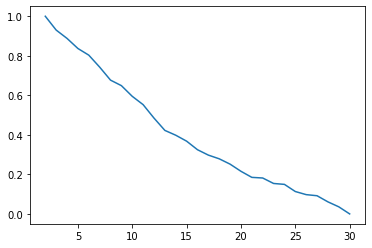

In [ ]:
plt.plot(range(2, MAX_CLUSTERS+1), normalized_arr(np.array(cri_gmm)));

In [ ]:
def normalized_arr(arr):
  return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [ ]:
len(new_cri_gmm)

29

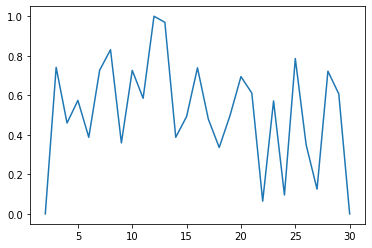

In [ ]:
plt.plot(range(2, MAX_CLUSTERS+1), normalized_arr(np.array(new_cri_gmm)));

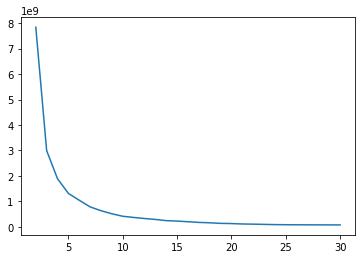

In [ ]:
plt.plot(range(2, MAX_CLUSTERS+1), cri_mean);

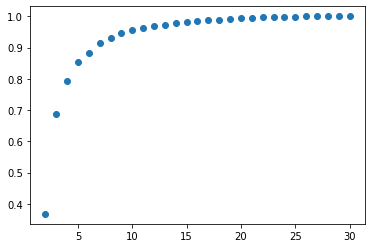

In [ ]:
# new_cri = []
# for i in range(1, 98):
#   new_cri.append()
plt.scatter(range(2, MAX_CLUSTERS+1), np.exp(-normalized_arr(np.array(cri_mean))));

#RESUME

In [ ]:
from scipy.linalg import eigh

In [ ]:

from scipy.spatial.distance import euclidean, pdist, squareform

def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

dists = pdist(mini_dataset, similarity_func)

In [ ]:
similarity_matrix = squareform(dists)

In [ ]:
N=10000

In [ ]:
def help_to_find_m(sim_mat, max_m):
  return eigh(sim_mat, eigvals_only=True, subset_by_index=[N-max_m, N-1])
  # pca = PCA(n_components=max_m)
  # pca_emb = pca.fit_transform(sim_mat)
  # return pca.explained_variance_ratio_

In [ ]:
MAX_CLUSTERS = 50
EPS = 1e-3

In [ ]:
similarity_eigs = help_to_find_m(similarity_matrix + simil, MAX_CLUSTERS)

KeyboardInterrupt: ignored

In [ ]:
similarity_eigs = similarity_eigs[::-1]

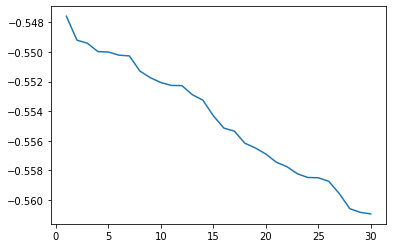

In [ ]:
plt.plot(range(1, MAX_CLUSTERS+1), similarity_eigs);

In [ ]:
drop_off_above = [0]
for i in range(1, MAX_CLUSTERS):
  drop_off_above.append(similarity_eigs[i - 1] / (similarity_eigs[i] + EPS))

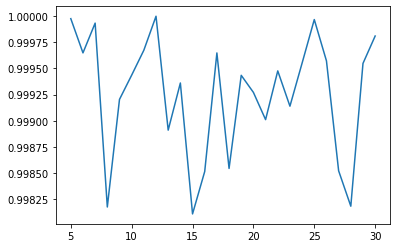

In [ ]:
plt.plot(range(5, MAX_CLUSTERS+1), normalized_arr(np.array(drop_off_above)));

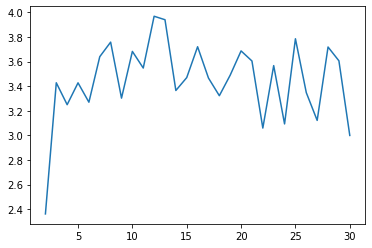

In [ ]:
total_weigth_num_manifolds = np.exp(-normalized_arr(np.array(cri_mean))) + normalized_arr(np.array(new_cri_gmm)) + 2 * normalized_arr(np.array(drop_off_above))[1:]
plt.plot(range(2, MAX_CLUSTERS+1), total_weigth_num_manifolds);

In [ ]:
np.array(drop_off_above)[:] ## M = 12 or 25

array([0.        , 0.99887841, 1.00144049, 1.00079386, 1.00176631,
       1.00143822, 1.00172353, 0.99996086, 1.00099226, 1.00122477,
       1.00146363, 1.00178939, 1.00069772, 1.00114953, 0.99989456,
       1.00030094, 1.00143763, 1.00033047, 1.00122309, 1.00105929,
       1.0007984 , 1.0012655 , 1.00092726, 1.00134062, 1.00175751,
       1.00136164, 1.0003078 , 0.99996861, 1.00133718, 1.00159988])

In [ ]:
mini_dataset.shape

(10000, 25)

In [ ]:
m = 30

In [ ]:
from sklearn.cluster import SpectralClustering
clustering_manifold_minidataset = SpectralClustering(n_clusters=m, affinity = 'precomputed', random_state=42).fit(similarity_matrix)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_manifold_minidataset = AgglomerativeClustering(n_clusters=m, linkage='single').fit(mini_dataset)
                                                                         

In [ ]:
np.unique(clustering_manifold_minidataset.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32),
 array([1765,  851,  587,   68,  857,  508,  672,  128,  460,  724,  551,
          53,   48,  130,  502,   52,  181,  684,   85,   89,  414,   52,
          81,   76,   32,   71,   67,   67,   80,   65]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca_mini = PCA(n_components=3)
pca_embedded_mini = pca_mini.fit_transform(mini_dataset)

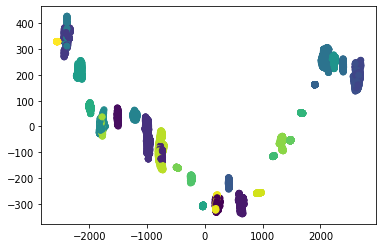

In [ ]:
plt.scatter(pca_embedded_mini[:,0], pca_embedded_mini[:,1], c = clustering_manifold_minidataset.labels_)
plt.show()

In [ ]:
labels = []
for j in range(m):
  current_label = np.array([])
  for i in list(np.arange(10000)[clustering_manifold_minidataset.labels_ == j]):
    current_label = np.union1d(current_label, normals[clustering_new.labels_ == i])
  labels.append(current_label.astype('int'))

In [ ]:
labels = []
for j in range(m):
  current_label = np.array([])
  for i in list(np.arange(10000)[clustering.labels_ == j]):
    current_label = np.union1d(current_label, normals[clustering_new.labels_ == i])
  labels.append(current_label.astype('int'))

In [ ]:
total_clustering = np.array([])
for j in range(m):
  total_clustering = np.union1d(total_clustering, labels[j])

In [ ]:
total_clustering.shape

(119551,)

In [ ]:
is_Affine(data[labels[19]])

True

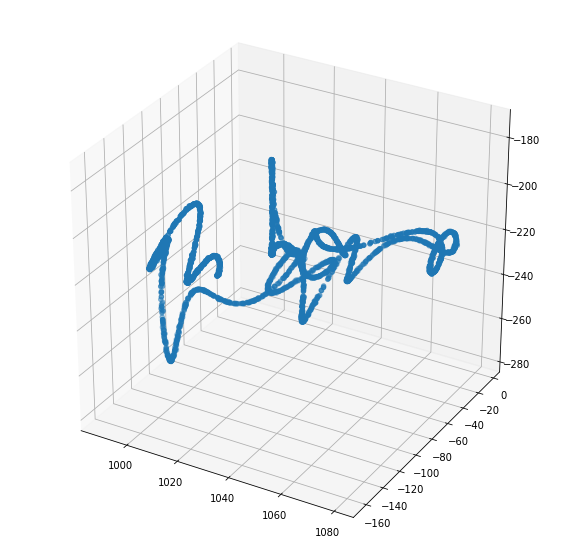

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_embedded[labels[4], 0], 
           pca_embedded[labels[4], 1],
           pca_embedded[labels[4], 2])

plt.show()

In [ ]:
def sphere_fit(point_cloud, lam):
    """
    input
        point_cloud: xyz of the point clouds　numpy array
    output
        radius : radius of the sphere
        sphere_center : xyz of the sphere center
    """

    A_1 = np.zeros((d,d))
    #A_1 : 1st item of A
    v_1 = np.array([0.0] * d)
    v_2 = 0.0
    v_3 = np.array([0.0] * d)
    # mean of multiplier of point vector of the point_clouds
    # v_1, v_3 : vector, v_2 : scalar

    N = len(point_cloud)
    #N : number of the points

    """Calculation of the sum(sigma)"""
    for v in point_cloud:
        v_1 += v
        v_2 += np.dot(v, v)
        v_3 += np.dot(v, v) * v

        A_1 += np.dot(np.array([v]).T, np.array([v]))

    v_1 /= N
    v_2 /= N
    v_3 /= N
    A = 2 * (A_1 / N - np.dot(np.array([v_1]).T, np.array([v_1]))) + np.eye(d, d) * lam / 2
    # formula ②
    b = v_3 - v_2 * v_1 + lam / 2 * v_1
    # formula ③
    # sphere_center = np.dot(np.linalg.inv(A), b)
    sphere_center = np.linalg.lstsq(A, b)[0]
    #　formula ①
    radius = (sum(np.linalg.norm(np.array(point_cloud) - sphere_center, axis=1))
              /len(point_cloud))

    return(radius, sphere_center)

In [ ]:
centers = []
radii = []
for i in range(m):
  radius, center = sphere_fit(data[labels[i]], 2)
  centers.append(center)
  radii.append(radius)
  if i % 5 == 0:
    print(f'{i} steps has done.')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


0 steps has done.
5 steps has done.
10 steps has done.
15 steps has done.
20 steps has done.


In [ ]:
def is_Sphere(dataset, est_center, est_radius, noise_deviation_percentage):
  distances_from_center = np.linalg.norm(dataset - est_center, axis=1)
  distances_from_radius = np.abs(distances_from_center - est_radius)
  distances_from_radius_per = distances_from_radius / est_radius
  return np.all(distances_from_radius_per < noise_deviation_percentage)
  

In [ ]:
def is_Affine(dataset, exact_error=1):
  pca_affine_detection = PCA(n_components=d)
  pca_affine_embedded = pca_affine_detection.fit_transform(dataset)
  dim = our_find_dimension(dataset)
  a = dataset @ calculate_orth(dataset, dim).T
  left_tail = -exact_error < (a - a.mean(axis=0))
  right_tail = (a - a.mean(axis=0)) < exact_error
  return np.all(left_tail & right_tail)


In [ ]:
SPHERE_NOISE = 0.05

In [ ]:
is_Sphere(data[labels[8]], centers[8], radii[8], SPHERE_NOISE)

False

In [ ]:
is_Affine(data[labels[8]])

True

In [ ]:
data[labels[24]].shape

(2264, 25)

In [ ]:
REDUCTION_DIMENSION = int(d / 2)

In [ ]:
import umap
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=REDUCTION_DIMENSION,
    random_state=42,
).fit_transform(data[labels[23]])

In [ ]:
# from graspologic.cluster.autogmm import AutoGMMCluster
from graspologic.cluster.kclust import KMeansCluster
autogmm_ = KMeansCluster(max_clusters=10).fit(clusterable_embedding)

In [ ]:
np.max(autogmm_.predict(clusterable_embedding))

1

25
[7.52067695e+02 5.77277991e+02 4.32100422e+02 3.31698816e+02
 2.47294119e+02 1.87309427e+02 1.45666140e+02 1.11510470e+02
 8.14351934e+01 6.21313872e+01 4.79822858e+01 3.50452608e+01
 3.13994244e+01 2.67397352e+01 2.05029304e+01 1.46826833e+01
 9.82311718e+00 3.01668880e-02 2.99034258e-02 2.96545450e-02
 2.89901630e-02 2.86008466e-02 2.81089096e-02 2.77133837e-02
 2.62055236e-02]


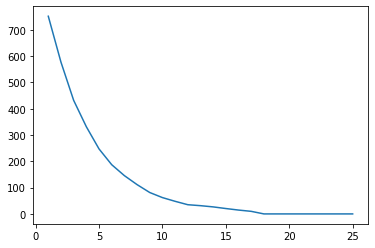

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
def view(label):
    pca = PCA(n_components=d)
    pca_emb = pca.fit_transform(label)
    print(d)
    plt.plot(np.arange(1, d + 1), pca.explained_variance_)
    print(pca.explained_variance_)
    plt.show()
view(data[labels[23]])

In [ ]:
DIMENSION_DETECTION_TH = 0.001
def our_find_dimension(dataset):
  for i in range(d + 1):
    pca = PCA(n_components=d)
    pca_emb = pca.fit_transform(dataset)
    return len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > DIMENSION_DETECTION_TH])

In [ ]:
def calculate_orth(dataset, dim):
  pca = PCA(n_components=d)
  pca_emb = pca.fit_transform(dataset)
  return pca.components_[dim:]

In [ ]:
def farahmand_find_dimension(dataset):
  farah = skdim.id.MADA().fit(dataset)
  return round(farah.dimension_)

In [ ]:
def get_sphere_data(data_index, center, radius, cnum):
  ans = {}
  ans['Type'] = 'Sphere'
  ans['Data Index'] = data_index
  ans['Dimension'] = our_find_dimension(data[data_index])
  ans['Center'] = center
  ans['Radius'] = radius
  ans['Orth Basis'] = calculate_orth(data[data_index], ans['Dimension'])
  ans['B Vector'] = np.mean(data[data_index], axis=0) @ ans['Orth Basis'].T


  # clusterable_embedding = umap.UMAP(
  #   n_neighbors=30,
  #   min_dist=0.0,
  #   n_components=REDUCTION_DIMENSION,
  #   random_state=42,
  # ).fit_transform(data[data_index])
  # inner_clustering = KMeansCluster(max_clusters=10).fit_predict(clusterable_embedding)

  # ans['No. Clusters'] = np.max(inner_clustering) + 1

  # ans['Clustering'] = inner_clustering

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = 20, affinity = 'nearest_neighbors', 
    assign_labels='kmeans',
    random_state=0).fit(data[data_index])

  ans['No. Clusters'] = cnum
  ans['Clustering'] =  clustering_t.labels_

  return ans

def get_affine_data(data_index, cnum):
  ans = {}
  ans['Type'] = 'Affine'
  ans['Data Index'] = data_index
  ans['Dimension'] = our_find_dimension(data[data_index])

  ans['Orth Basis'] = calculate_orth(data[data_index], ans['Dimension'])
  ans['B Vector'] = np.mean(data[data_index], axis=0) @ ans['Orth Basis'].T


  # clusterable_embedding = umap.UMAP(
  #   n_neighbors=30,
  #   min_dist=0.0,
  #   n_components=REDUCTION_DIMENSION,
  #   random_state=42,
  # ).fit_transform(data[data_index])
  # inner_clustering = KMeansCluster(max_clusters=10).fit_predict(clusterable_embedding)

  # ans['No. Clusters'] = np.max(inner_clustering) + 1
  # ans['Clustering'] = inner_clustering

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = 20, affinity = 'nearest_neighbors', 
    assign_labels='kmeans',
    random_state=0).fit(data[data_index])

  ans['No. Clusters'] = cnum
  ans['Clustering'] =  clustering_t.labels_
  

  return ans

def get_complex_data(data_index, cnum):
  ans = {}
  ans['Type'] = 'Complex'
  ans['Data Index'] = data_index
  ans['Dimension'] = farahmand_find_dimension(data[data_index])

  # clusterable_embedding = umap.UMAP(
  #   n_neighbors=30,
  #   min_dist=0.0,
  #   n_components=REDUCTION_DIMENSION,
  #   random_state=42,
  # ).fit_transform(data[data_index])
  # inner_clustering = KMeansCluster(max_clusters=10).fit_predict(clusterable_embedding)

  # ans['No. Clusters'] = np.max(inner_clustering) + 1

  # ans['Clustering'] = inner_clustering

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = 20, affinity = 'nearest_neighbors', 
    assign_labels='kmeans',
    random_state=0).fit(data[data_index])

  ans['No. Clusters'] = cnum
  ans['Clustering'] =  clustering_t.labels_

  return ans

In [ ]:
our_find_dimension(data[labels[23]])

17

In [ ]:
data_for_each_manifold = []
for i in range(m):
  if is_Sphere(data[labels[i]], centers[i], radii[i], SPHERE_NOISE):
    data_for_each_manifold.append(get_sphere_data(labels[i], centers[i], radii[i], num_clusters[i]))
  elif is_Affine(data[labels[i]]):
    data_for_each_manifold.append(get_affine_data(labels[i], num_clusters[i]))
  else:
    data_for_each_manifold.append(get_complex_data(labels[i], num_clusters[i]))
  print(f"{i}th manifold has been handled!")

0th manifold has been handled!
1th manifold has been handled!
2th manifold has been handled!
3th manifold has been handled!
4th manifold has been handled!
5th manifold has been handled!
6th manifold has been handled!
7th manifold has been handled!
8th manifold has been handled!
9th manifold has been handled!
10th manifold has been handled!
11th manifold has been handled!
12th manifold has been handled!
13th manifold has been handled!
14th manifold has been handled!
15th manifold has been handled!
16th manifold has been handled!
17th manifold has been handled!
18th manifold has been handled!
19th manifold has been handled!
20th manifold has been handled!
21th manifold has been handled!
22th manifold has been handled!
23th manifold has been handled!
24th manifold has been handled!


In [ ]:
def to_str_c(data):
  ans = ""
  for i in range(len(data)):
    ans += str(data[i]) + " "
  return ans

In [ ]:
def get_string_data(manifold_data):
  ans = f"{manifold_data['Dimension']} {manifold_data['No. Clusters']} {manifold_data['Type']}\n"
  if manifold_data['Type'] == 'Sphere' or manifold_data['Type'] == 'Affine':
    for jj in range(len(manifold_data['Orth Basis'])):
      ans += f"{to_str_c(manifold_data['Orth Basis'][jj])}\n"
    ans += f"{to_str_c(manifold_data['B Vector'])}\n"

  if manifold_data['Type'] == 'Sphere':
    ans += f"{to_str_c(manifold_data['Center'])} {manifold_data['Radius']}\n"
  
  indices = manifold_data['Data Index'] + 1

  for jj in range(manifold_data['No. Clusters']):
    temp = indices[manifold_data['Clustering'] == jj] 
    ans += f'{len(temp)} {(to_str_c(np.sort(temp)))}\n'

  return ans


In [ ]:
data_for_each_manifold[0]['Type']

'Complex'

In [ ]:
ans = f'{n} {m}\n'
for data_for_manifold in data_for_each_manifold:
    ans += get_string_data(data_for_manifold)

ans += f'{len(outliers)} {to_str_c(outliers + 1)}'

In [ ]:
with open("output.txt", "w") as f:
  f.write(ans)

In [ ]:
neigh_similarity.shape

(6640, 6640)

In [ ]:
from scipy.sparse.linalg import eigsh

In [ ]:
from sklearn.neighbors import kneighbors_graph
conn = kneighbors_graph(data[labels[0]], n_neighbors=30)
neigh_similarity = 0.5 * (conn + conn.T)

In [ ]:
def help_to_find_k(sim_mat, max_m):
  
  return eigsh(csgraph.laplacian(sim_mat, normed=True), k=max_m, return_eigenvectors=False, which='LM', maxiter=10000)


In [ ]:
similarity_eigs = np.sort(help_to_find_k(neigh_similarity, 10))
# for i in range(10):
#   similarity_eigs += np.sort(help_to_find_k(neigh_similarity, 10))

In [ ]:
similarity_eigs = similarity_eigs[::-1]

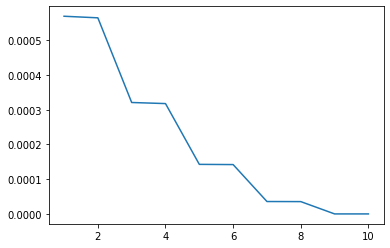

In [ ]:
plt.plot(range(1, 11), similarity_eigs);

In [ ]:
drop_off_above_k = []
for i in range(0, 9):
  drop_off_above_k.append(similarity_eigs[i] - similarity_eigs[i + 1])

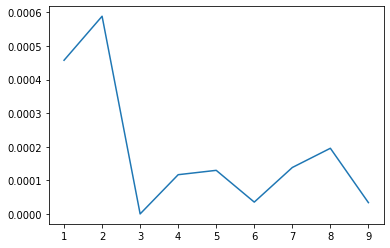

In [ ]:
plt.plot(range(1, 10), drop_off_above_k);

In [ ]:
labels[2].shape

(7810,)

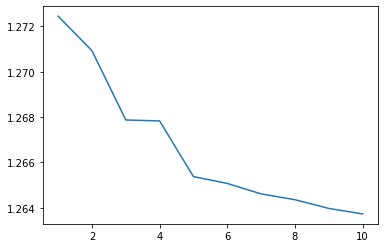

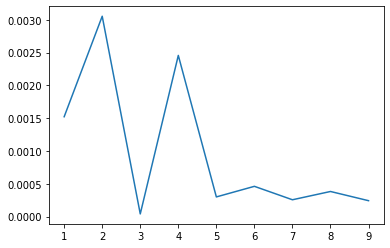

ploting 0


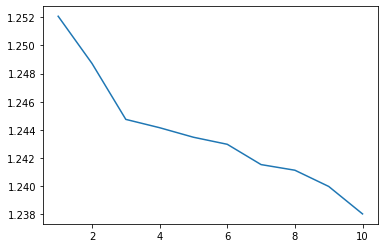

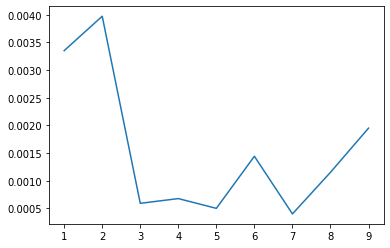

ploting 1


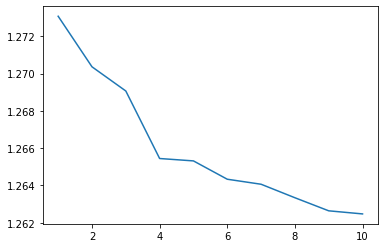

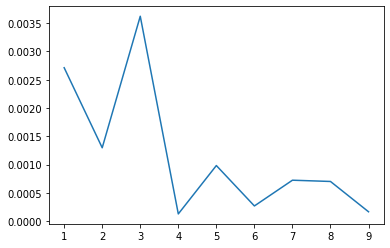

ploting 2


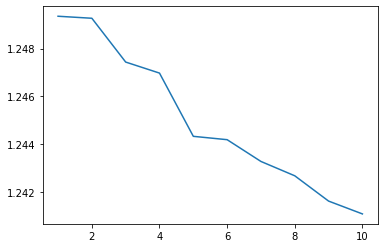

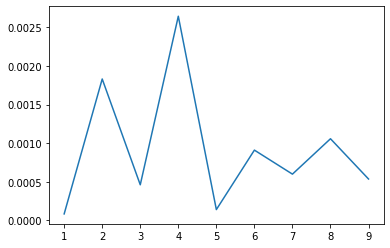

ploting 3


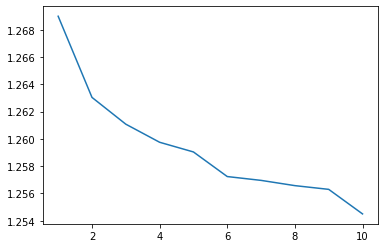

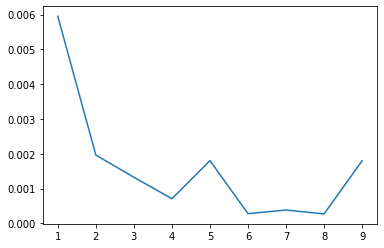

ploting 4


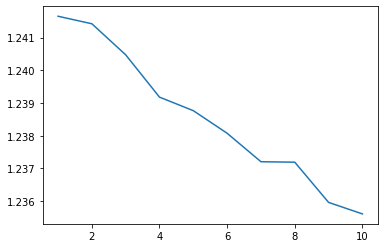

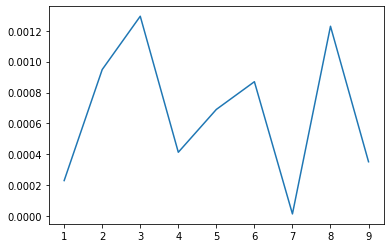

ploting 5


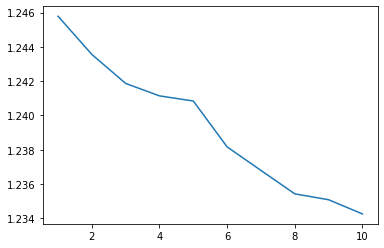

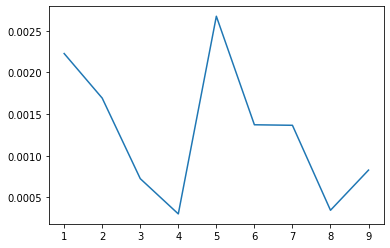

ploting 6


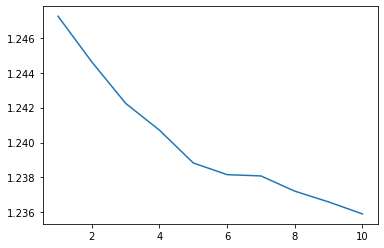

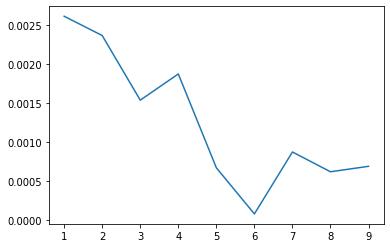

ploting 7


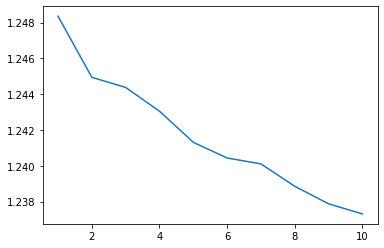

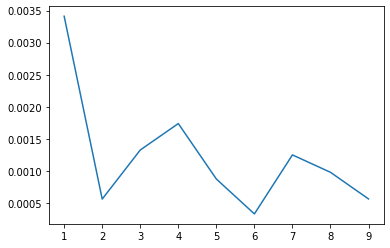

ploting 8


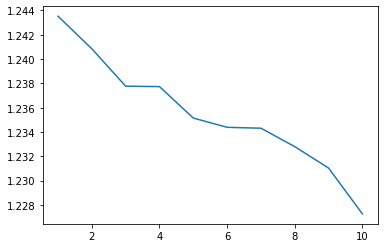

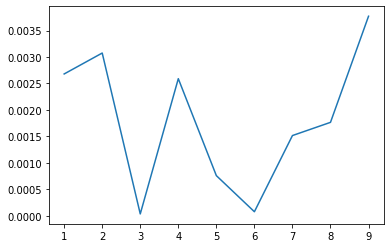

ploting 9


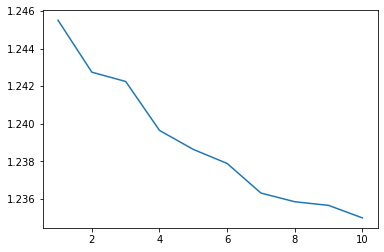

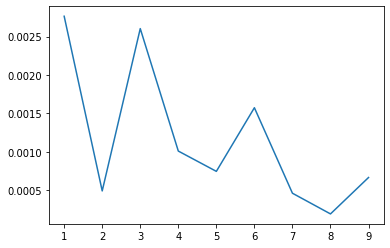

ploting 10


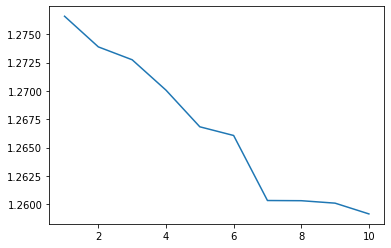

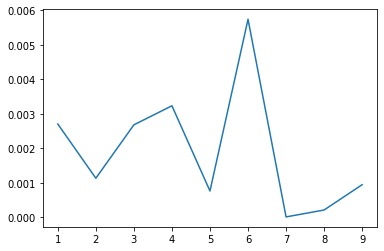

ploting 11


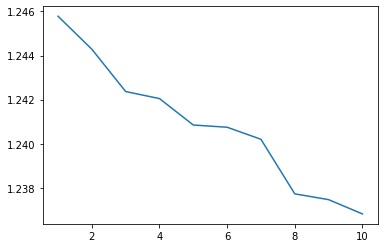

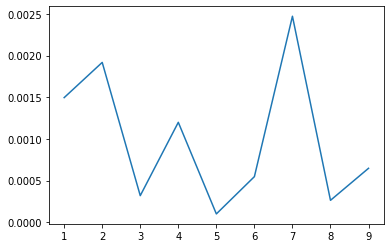

ploting 12


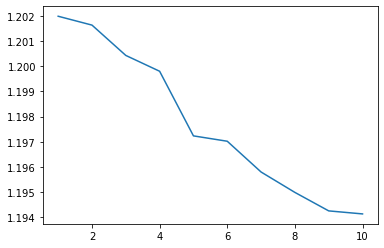

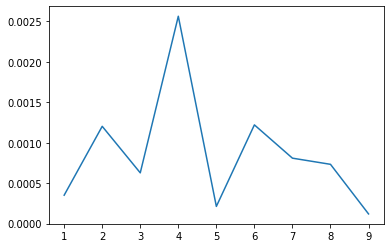

ploting 13


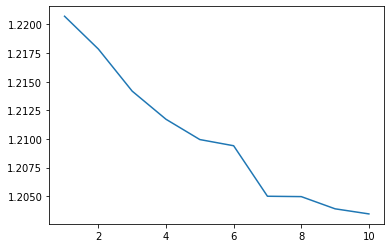

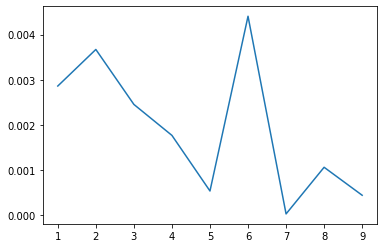

ploting 14


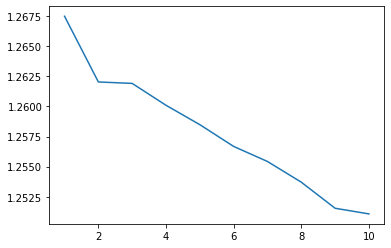

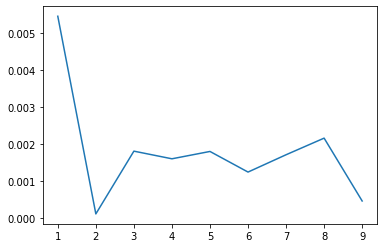

ploting 15


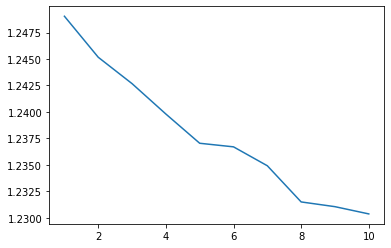

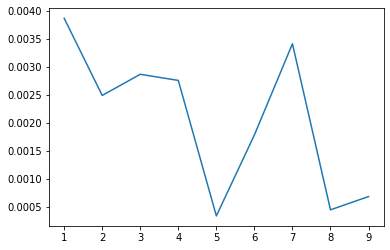

ploting 16


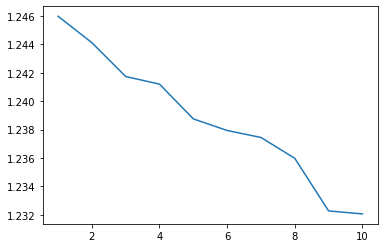

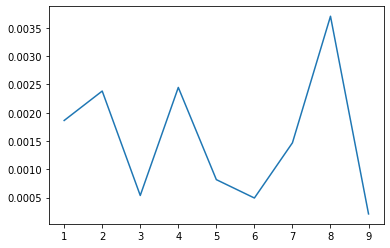

ploting 17


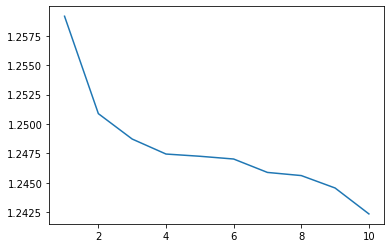

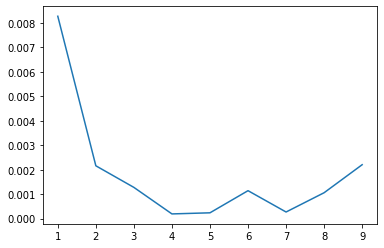

ploting 18


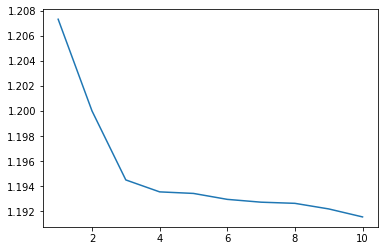

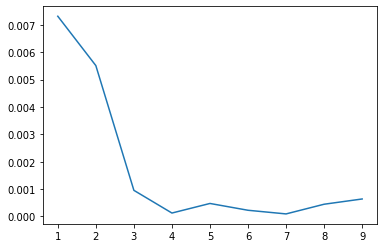

ploting 19


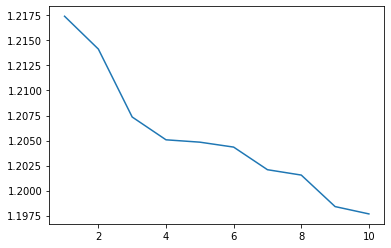

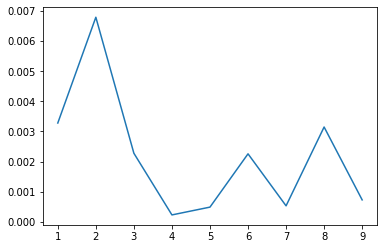

ploting 20


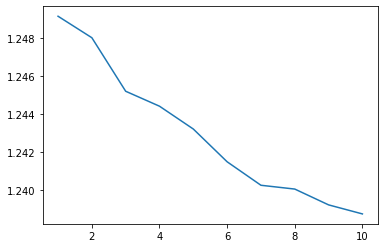

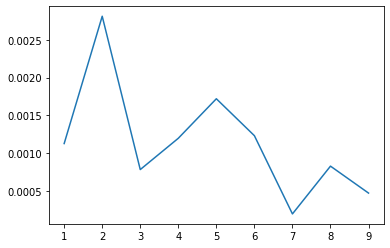

ploting 21


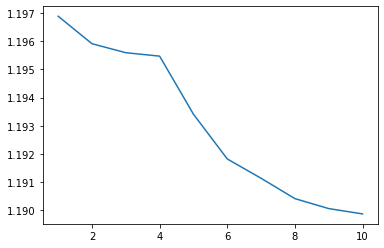

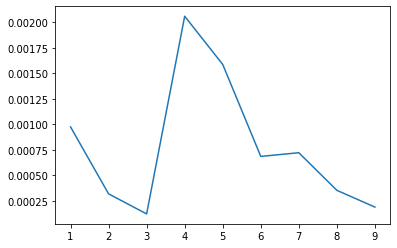

ploting 22


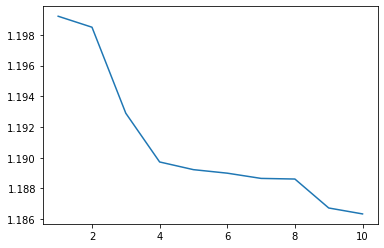

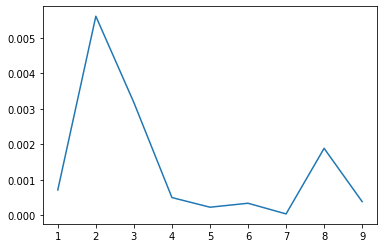

ploting 23


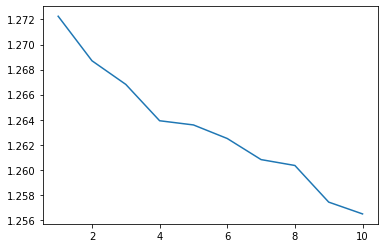

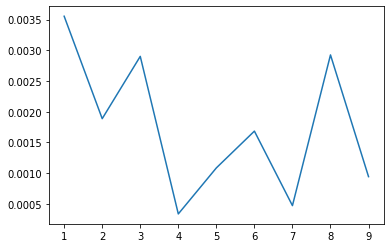

ploting 24


In [ ]:
num_clusters = []
for i in range(m):
  neigh_similarity = kneighbors_graph(data[labels[i]], n_neighbors=30)
  similarity_eigs_k = help_to_find_k(0.5 * (neigh_similarity + neigh_similarity.T), 10)
  similarity_eigs_k = np.sort(similarity_eigs_k)[::-1]
  plt.plot(range(1, 11), similarity_eigs_k)
  plt.show()
  drop_off_above_k = []
  for ii in range(0, 9):
    drop_off_above_k.append(similarity_eigs_k[ii] - similarity_eigs_k[ii + 1])
  plt.plot(range(1, 10), drop_off_above_k)
  plt.show()
  num_clusters.append(np.argmax(drop_off_above_k) + 1)
  print(f"ploting {i}")

In [ ]:
num_clusters

[2, 2, 3, 4, 1, 3, 5, 1, 1, 9, 1, 6, 7, 4, 6, 1, 1, 8, 1, 1, 2, 2, 4, 2, 1]

In [ ]:
neigh_similarity = kneighbors_graph(data[labels[0]], n_neighbors=30)

In [ ]:
predict_k(neigh_similarity)

KeyboardInterrupt: ignored

In [ ]:
farah = skdim.id.MiND_ML().fit_transform_pw(data[normals])

In [ ]:
dims = np.unique(np.round(farah))

In [ ]:
np.unique(np.round(farah), return_counts=True)

(array([ 1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10.]),
 array([  949, 65930,  5015,  2583,   304,  7169, 20357, 13869,  3375]))